# Research Question

We want to answer the question: Which variables in our dataset contribute mose to the variability of the data? The endgoal of such an analysis is to reduce our data to only the principle components in order to make future analysis more eficient. 

# Method Justification

We will be using Principal Components Analysis (PCA) to achieve our goal. PCA works by combining multiple numeric predictor variable into a smaller set of variables, which are weighted combinations of the original set. This smaller set, called the *principle components*, explains most of the variability of the full set of variables. This reduces the dimension of the data. [1] We expect the outcome of our PCA to be a reduction of data into a smaller set of variables to use for further analysis.

PCA assumes that the data is continuous.

# Data Preparation

The continuous variables in our dataset are:

- ``Population``
- ``Children``
- ``Age``
- ``Income``
- ``Doc_visits``
- ``Full_meals_eaten``
- ``Initial_days``
- ``TotalCharge``
- ``Additional_charges``

We will now import our data and select only these variables.

In [58]:
import pandas as pd

raw = pd.read_csv('data/medical_clean.csv')
df = raw[[  'Population', 'Children', 'Age', 
            'Income', 'Doc_visits', 'Full_meals_eaten', 
            'Initial_days', 'TotalCharge', 'Additional_charges'
        ]]
df.head()

,Population,Children,Age,Income,Doc_visits,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges
0,2951,1,53,86575.93,6,0,10.585770,3726.702860,17939.403420
1,11303,3,51,46805.99,4,2,15.129562,4193.190458,17612.998120
2,17125,3,53,14370.14,4,1,4.772177,2434.234222,17505.192460
3,2162,0,78,39741.49,4,1,1.714879,2127.830423,12993.437350
4,5287,1,22,1209.56,5,0,1.254807,2113.073274,3716.525786


Now we will normalize the data. A normalized copy of the dataset can be found in ``data/medical_norm.csv``

In [59]:
df = (df - df.mean()) / df.std()
df.to_csv('data/medical_norm.csv')
df.head()

,Population,Children,Age,Income,Doc_visits,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges
0,-0.473145,-0.507104,-0.024793,1.615833,0.944599,-0.993337,-0.907264,-0.727148,0.764967
1,0.090237,0.417256,-0.121700,0.221432,-0.967932,0.990560,-0.734558,-0.513202,0.715078
2,0.482959,0.417256,-0.024793,-0.915824,-0.967932,-0.001389,-1.128235,-1.319917,0.698600
3,-0.526366,-0.969284,1.186533,-0.026261,-0.967932,-0.001389,-1.244441,-1.460444,0.009004
4,-0.315570,-0.507104,-1.526838,-1.377256,-0.011666,-0.993337,-1.261928,-1.467212,-1.408920


# Analysis

## Matrix 

First we run our PCA and generate a PCA matrix.

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=df.shape[1])
pca.fit(df)

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
Population,0.024233,-0.028612,0.581358,-0.243730,0.227238,0.448277,0.590267,0.014383,-0.000941
Children,0.034673,0.017303,0.037514,0.704442,0.552531,0.370751,-0.241023,0.003594,-0.000934
Age,0.084288,0.701083,0.020617,-0.019588,0.008044,-0.024126,0.000180,0.706566,0.026228
Income,-0.020259,-0.018756,0.424780,0.524912,-0.116638,-0.646528,0.334152,0.002302,0.001314
Doc_visits,-0.007035,0.015045,0.420300,0.207994,-0.709498,0.391319,-0.351127,0.000982,-0.001118
Full_meals_eaten,-0.020177,0.031891,-0.549588,0.353525,-0.352513,0.298534,0.598367,0.010717,-0.001652
Initial_days,0.700538,-0.089416,-0.013473,0.002107,-0.028657,-0.019910,0.005306,0.031468,-0.706279
TotalCharge,0.701657,-0.078853,-0.013454,0.002910,-0.029187,-0.015939,0.007057,-0.031428,0.706489
Additional_charges,0.084633,0.701111,0.026294,-0.013650,0.008796,-0.010335,0.020584,-0.706007,-0.036726


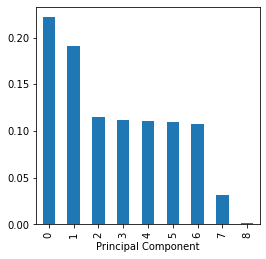

In [61]:
import matplotlib.pyplot as plt

explained_variance = pd.DataFrame(pca.explained_variance_ratio_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Principal Component')

plt.show()

## Elbow Rule

We will generate a bar graph of the explained variance of the PCs and look for an "elbow" in the data. That is, a point where the explained variance drops dramatically.

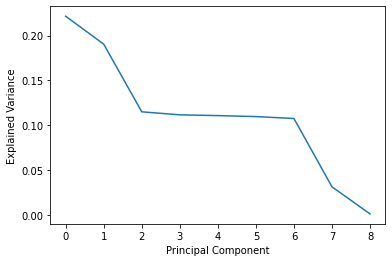

In [62]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

## Variance of all PCs

In [63]:
print(pca.explained_variance_ratio_)

[0.22159446 0.19053248 0.1150816  0.11170826 0.11087941 0.10976332
 0.10764419 0.03149445 0.00130182]


## Total Variance

In [64]:
print(pca.explained_variance_ratio_.cumsum())

[0.22159446 0.41212695 0.52720855 0.63891681 0.74979622 0.85955954
 0.96720373 0.99869818 1.        ]


## Results

Looking at our scree-plot above we can see the "elbow" at x=2, or the 3rd PC. This indicates that the first 3 components account for most of the variation. PC1 is 22%, PC2 is 19%, and PC3 is 11% for a total of about 52%. Using these three components would yield reasonably decent results, though the variance explained may be too low for some use cases. 

# Bibliography

[1] Peter Bruce, Andrew Bruce, Peter Gedeck. *Practical Statistics for Data Scientists*. O'Reilly Media, Inc., 2020. Page 295. 